# Title - ABC

Imports ..

In [237]:
import pandas
import re
import warnings
import numpy
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import calendar



Set up the function.

In [238]:
def crateBaseTabe(listingPath, reviewsPath, year):
    """
    Crates a Tabel that can be process by CreateCalendar.
    :param listingPath: the smaller listing csv file
    :param reviewsPath: the smaller review csv file
    :return: a tabel with listing_id, date, minimum_nights, price, adjusted_price, maximum_nights
    """
    # joining the tables with a left join on id
    tempListing = pandas.read_csv(listingPath)
    dataframeReviews = pandas.read_csv(reviewsPath)
    # get rid of u
    dataframeReviews = dataframeReviews[dataframeReviews["comments"].str.contains("This is an automated posting") == False]
    dataframeReviews = dataframeReviews.drop('id', axis=1)
    dataframeReviews = dataframeReviews.drop('reviewer_id', axis=1)
    dataframeReviews = dataframeReviews.drop('reviewer_name', axis=1)
    dataframeReviews = dataframeReviews.drop('comments', axis=1)
    dataframeReviews = dataframeReviews[dataframeReviews['date'].astype("string").str.contains(year)==True]
    #creating the tabel with the right columns
    dataframeListing = pandas.DataFrame()
    dataframeListing['listing_id'] = tempListing['id']
    dataframeListing['price'] = tempListing ['price']
    dataframeListing['adjusted_price'] = tempListing ['price']
    dataframeListing['minimum_nights'] = tempListing['minimum_nights']
    dataframeListing['maximum_nights'] = tempListing['minimum_nights']
    # joining the tables with a left join on id
    table = pandas.merge(dataframeReviews, dataframeListing, how="left", on=["listing_id"])
    return table

def createTabelObjekt(listing_id, dateOfBooking, minimum_nights, price, adjusted_price, maximum_nights, year):
    """

    :param year:
    :param listing_id:
    :param dateOfBooking: Array of the bookings
    :param minimum_nights:
    :param price:
    :param adjusted_price:
    :param maximum_nights:
    :return:
    """

    def calculateAvailabile(dateList):
        """
        nur 2022??
        :param dateList:
        :return:
        """
        print(dateList)
        falseDates = []
        for j in dateList:
                if j[1] != 0:
                    for k in range(int(j[1])):
                        falseDates.append(str((datetime.strptime(j[0], '%Y-%m-%d')+ timedelta(days=k)).date()))
        #print(falseDates)
        return falseDates

    def printIfAvailabil(day):
        """

        :param day:
        :return:
        """
        if str(day) in notAvailabileDays:
            return 'f'
        else:
            return 't'

    notAvailabileDays = calculateAvailabile (dateOfBooking)
    yearDayCounter = 365 + calendar.isleap(int(year))

    collumsNames = {'listing_id': [], 'date': [], 'available':[], 'price':[], 'adjusted_price':[], 'minimum_nights':[], 'maximum_nights':[]}
    for i in range(yearDayCounter):
        k = printIfAvailabil((datetime.strptime((year+"-01-01"), '%Y-%m-%d')+ timedelta(days=i)).date())
        collumsNames['listing_id'].append(listing_id)
        collumsNames['date'].append((datetime.strptime((year+"-01-01"), '%Y-%m-%d')+ timedelta(days=i)).date())
        collumsNames['available'].append(k)
        collumsNames['price'].append(price)
        collumsNames['adjusted_price'].append(adjusted_price)
        collumsNames['minimum_nights'].append(minimum_nights)
        collumsNames['maximum_nights'].append(maximum_nights)

    returnTabel = pandas.DataFrame(collumsNames)
    return returnTabel

[('2020-01-13', 3)]
[('2020-07-13', 3), ('2020-08-02', 3)]
[('2020-02-13', 5), ('2020-11-10', 5)]
[('2020-02-16', 1), ('2020-03-04', 1), ('2020-07-12', 1), ('2020-07-24', 1), ('2020-08-07', 1), ('2020-10-16', 1), ('2020-11-15', 1)]
[('2020-03-04', 20)]
[('2020-01-08', 4), ('2020-02-03', 4), ('2020-02-29', 4)]
[('2020-01-04', 5), ('2020-11-03', 5), ('2020-12-23', 5)]
[('2020-01-03', 2), ('2020-01-06', 2), ('2020-01-19', 2), ('2020-02-01', 2), ('2020-02-07', 2), ('2020-02-15', 2), ('2020-02-22', 2), ('2020-02-24', 2), ('2020-03-04', 2), ('2020-03-13', 2), ('2020-03-20', 2), ('2020-07-25', 2), ('2020-08-08', 2), ('2020-08-31', 2), ('2020-09-03', 2), ('2020-09-06', 2), ('2020-09-10', 2), ('2020-10-01', 2)]
[('2020-07-01', 7)]
[('2020-02-23', 1)]
[('2020-01-02', 2), ('2020-04-03', 2), ('2020-04-30', 2), ('2020-05-10', 2), ('2020-10-10', 2)]
[('2020-08-02', 2)]
[('2020-01-20', 1), ('2020-01-23', 1), ('2020-01-29', 1), ('2020-02-02', 1), ('2020-06-21', 1), ('2020-06-25', 1), ('2020-07-08', 1)

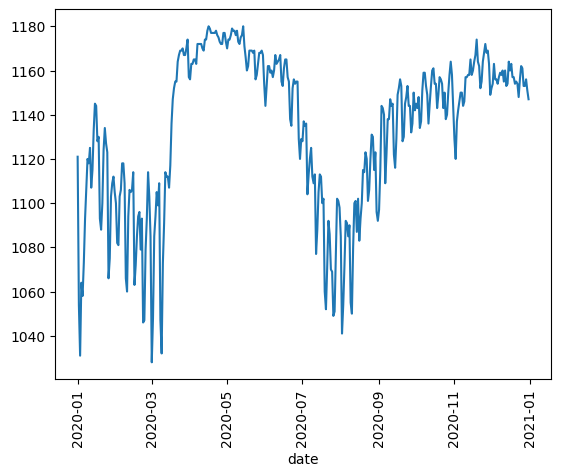

In [239]:
def notAvailabilityList(appartment, df):
    #indexList = [index, index, index, index]
    tempList = []
    for index in appartment:
        row = df.iloc[index]
        date = row['date']
        minStay = row['minimum_nights']
        tempList.append((date,minStay))
    return tempList



#that is the call --->(createTabelObjekt('123', {'2022-09-27' : 5}, '3','300','300','100','2019'))
def plotPastAvailability(listing, reviews, year):
    df = crateBaseTabe(listing, reviews, year)
    appartmentId = df['listing_id'].unique().tolist() # all id of apartments
    returnTable = pandas.DataFrame()
    for appartment in appartmentId:
        indexList = df[df['listing_id']==appartment].index.values
        notAvailability = notAvailabilityList(indexList, df)
        appartmentData = createTabelObjekt(appartment, notAvailability, df.iloc[indexList[0],0], df.iloc[indexList[0],0], df.iloc[indexList[0],0], df.iloc[indexList[0],0], year)
        returnTable = returnTable.append(appartmentData, ignore_index=True)
    returnTable.to_csv('demo.csv', encoding='utf-8')
    dataframePivod = pandas.get_dummies(returnTable.pivot(index="date", columns="listing_id", values="available"), prefix_sep='', prefix='').sum(axis=1, level=0)
    print(dataframePivod)

    dataframePivod['t'].plot()
    plt.xticks(rotation=90)
    plt.show()


plotPastAvailability('../data/Oslo/SmalListings.csv', '../data/Oslo/reviews.csv', '2020')



